Dallin Nielson\
DSC 530 - Data Exploration and Analysis\
Week 7 Exercises


# Exercises 7-1

#### 1. Using NSFG data, make a scatterplot of birth weight vs. mother's age.

Text(0.5, 0, "Mother's age")

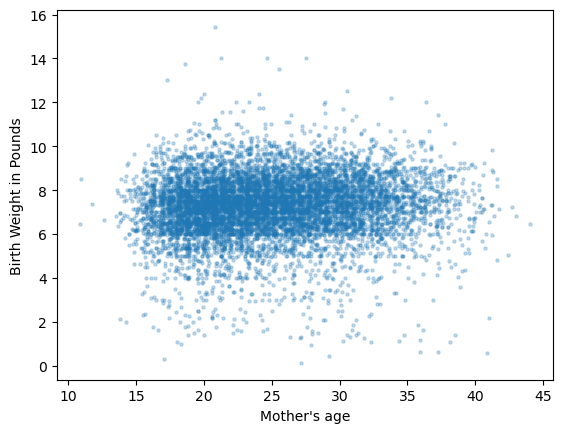

In [1]:
# Change to the directory containing the packages
import os
os.chdir(r'C:\Users\dalli\OneDrive\Documents\Education\DSC 530 - Data Exploration and Analysis\ThinkStats2\code')

import nsfg
import thinkplot
import thinkstats2
import matplotlib.pyplot as plt
import numpy as np

# Read the NSFG data
preg = nsfg.ReadFemPreg()
live_births = preg[preg.outcome==1].dropna(subset=['agepreg', 'totalwgt_lb'])

# Create a scatterplot of birth weight vs. mother's age
plt.scatter(live_births['agepreg'], live_births['totalwgt_lb'], alpha=.25, s=5)
plt.ylabel('Birth Weight in Pounds')
plt.xlabel("Mother's age")

#### 2. Plot percentiles of birth weight vs. mother's age.

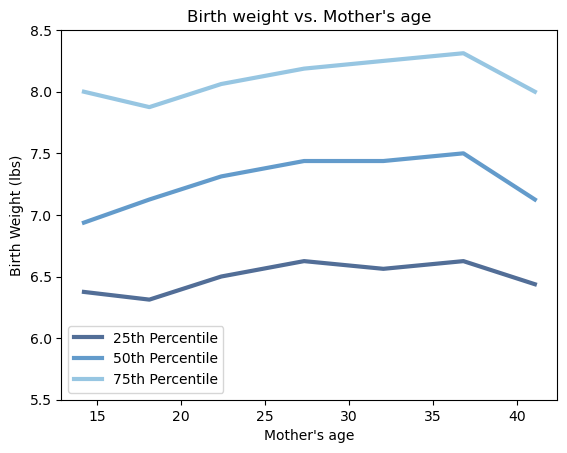

In [2]:
# Group the data by agepreg
bins = np.arange(10, 45, 5)
index = np.digitize(live_births['agepreg'], bins)
groups = live_births.groupby(index)

# Get the mean age and CDFs for each group
mean_ages = [group['agepreg'].mean() for group_num, group in groups]
cdfs = [thinkstats2.Cdf(group['totalwgt_lb']) for group_num, group in groups]

# Create the layers of the plot
thinkplot.preplot(3)
for percentile in [25, 50, 75]:
    rankings = [cdf.Percentile(percentile) for cdf in cdfs]
    thinkplot.Plot(mean_ages, rankings, label=f'{percentile}th Percentile')

# Create the final plot
thinkplot.Config(label=True, ylim=[5.5,8.5], 
                 title="Birth weight vs. Mother's age",
                 ylabel="Birth Weight (lbs)",
                 xlabel="Mother's age"
                )

#### 3. Compute Pearson's and Spearman's correlations.

In [3]:
p_cor = live_births['agepreg'].corr(live_births['totalwgt_lb'], method='pearson')
s_cor = live_births['agepreg'].corr(live_births['totalwgt_lb'], method='spearman')

print(f"Pearson's correlation: {round(p_cor, 3)}")
print(f"Spearman's correlation: {round(s_cor, 3)}")

Pearson's correlation: 0.069
Spearman's correlation: 0.095


#### 4. How would you describe the relationship between these two variables?

Judging from the graphs and correlation measures, there does not appear to be a meaningful relationship between birth weight and the mothers age. 

# Exercises 8-1

Start with a copy of estimation.py

In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.


#### 1. Create an experiment to see if $\bar{x}$ and median are biased estimates of µ.

In [4]:
import estimation
import random

# Set the variables
mean = 0
std = 1
n = 7
iterations = 10000

# Create empty lists to house the sample results
means = []
medians = []

# Create the samples
for i in range(iterations):
    xs = [random.gauss(mean, std) for i in range(n)]
    means.append(np.mean(xs))
    medians.append(np.mean(xs))

# Get the mean differences and print the results
mean_diffs = np.mean([m - mean for m in means])
median_diffs = np.median([m - mean for m in means])

print("Mean error:", round(mean_diffs, 5))
print("Median error:", round(median_diffs, 5))

Mean error: 0.00122
Median error: 0.00227


Both the mean and median errors are very small, indicating that they are both good estimates of µ.

#### 2. Create an experiment to check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [5]:
import math

# Create empty lists to house the sample results
biased_vars = []
unbiased_vars = []

# Create the samples
for i in range(iterations):
    xs = [random.gauss(mean, std) for i in range(n)]
    biased_vars.append(np.var(xs))
    unbiased_vars.append(np.var(xs, ddof=1))
    
# Get and print the RSME values
biased_mse = np.mean([(var - std**2)**2 for var in biased_vars])
biased_rsme = math.sqrt(biased_mse)
unbiased_mse = np.mean([(var - std**2)**2 for var in unbiased_vars])
unbiased_rsme = math.sqrt(unbiased_mse)

print('Biased RSME:', round(biased_rsme, 5))
print('Unbiased RSME:', round(unbiased_rsme, 5))

Biased RSME: 0.51969
Unbiased RSME: 0.58236


The biased RSME is lower.

# Exercises 8-2

Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. 

#### 1. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. 

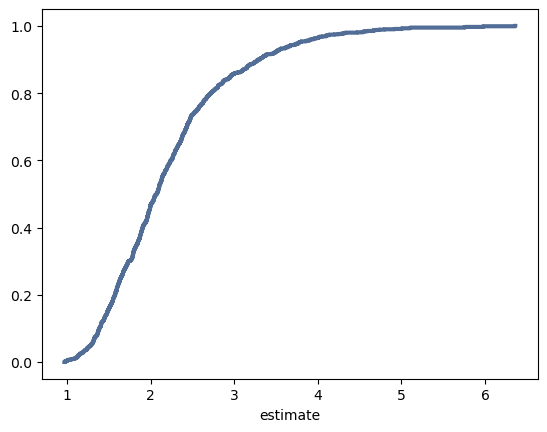

In [6]:
def exp_sample(sample_size, lmd, iterations):
    
    estimates = []
    
    # Create the estimates
    for i in range(iterations):
        xs = np.random.exponential(1/lmd, sample_size)
        estimates.append(1 / np.mean(xs))
        
    # Get the CDFs
    cdf = thinkstats2.Cdf(estimates)
    
    # Get the RMSE
    mse = np.mean([(est - l)**2 for est in estimates])
    rmse = math.sqrt(mse)
    
    # Get the 95% confidence intervals
    p5 = cdf.Percentile(5)
    p95 = cdf.Percentile(95)
    
    return estimates, cdf, rmse, p5, p95
    

n = 10
l = 2
i = 1000
    
est, cdf, rmse, p5, p95= exp_sample(n, l, i)

# Plot the CDFs
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel="estimate")

#### 2. Compute the standard error of the estimate and the 90% confidence interval.

In [7]:
print("Root mean squared error (RMSE):", rmse)
print(f"Confidence Interval: {round(p5, 3)} - {round(p95, 3)}")

Root mean squared error (RMSE): 0.8244049261700189
Confidence Interval: 1.287 - 3.77


#### 3. Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.

In [8]:
# Run an experiment where n=50
n2 = 50
est2, cdf2, rmse2, p5_2, p95_2 = exp_sample(n2, l, i)

print("Experiment 2: N = 50")
print("Root mean squared error (RMSE):", rmse2)
print(f"Confidence Interval: {round(p5_2, 3)} - {round(p95_2, 3)}")

Experiment 2: N = 50
Root mean squared error (RMSE): 0.3042044684344605
Confidence Interval: 1.585 - 2.567


In [9]:
# Run an experiment where n=200
n3 = 200
est3, cdf3, rmse3, p5_3, p95_3 = exp_sample(n3, l, i)

print("Experiment 3: N = 200")
print("Root mean squared error (RMSE):", rmse3)
print(f"Confidence Interval: {round(p5_3, 3)} - {round(p95_3, 3)}")

Experiment 3: N = 200
Root mean squared error (RMSE): 0.1500954866541141
Confidence Interval: 1.779 - 2.268


In [10]:
# Run an experiment where n=2000
n4 = 2000
est4, cdf4, rmse4, p5_4, p95_4 = exp_sample(n4, l, i)

print("Experiment 4: N = 2000")
print("Root mean squared error (RMSE):", rmse4)
print(f"Confidence Interval: {round(p5_4, 3)} - {round(p95_4, 3)}")

Experiment 4: N = 2000
Root mean squared error (RMSE): 0.04648558981078668
Confidence Interval: 1.926 - 2.073


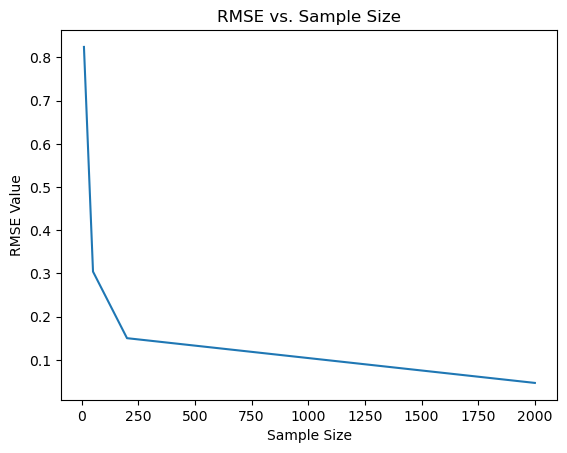

In [11]:
# Create lists for the results of each experiment
ns = [n, n2, n3, n4]
errors = [rmse, rmse2, rmse3, rmse4]
p5s = [p5, p5_2, p5_3, p5_4]
p95s = [p95, p95_2, p95_3, p95_4]

# Plot the RSME vs. the Sample Size
plt.plot(ns, errors)
plt.xlabel('Sample Size')
plt.ylabel('RMSE Value')
plt.title('RMSE vs. Sample Size')
plt.show()

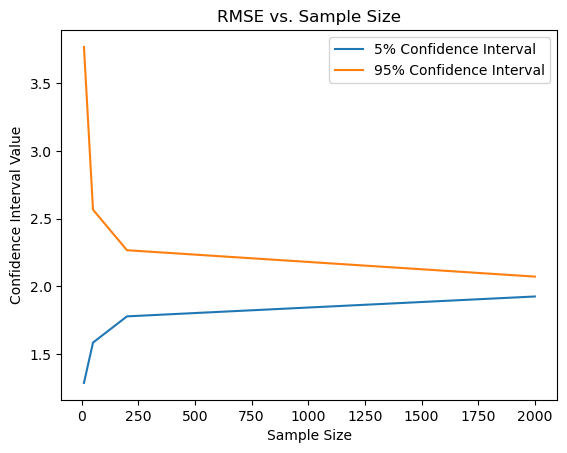

In [13]:
# Plot the Confidence Intervals vs the Sample Size
plt.plot(ns, p5s)
plt.plot(ns, p95s)
plt.legend(["5% Confidence Interval", "95% Confidence Interval"])
plt.xlabel('Sample Size')
plt.ylabel('Confidence Interval Value')
plt.title('RMSE vs. Sample Size')
plt.show()

As the sample size increased in the multiple experiments, the RMSE value decreased and the distance between the 5% and 95% confidence intervals also decreased.